<center>Lab1</center>
<center>19307130195 陈乐偲</center>


导入相关库

In [1]:
import numpy as np 
import pandas as pd 
import torch
from IPython.display import Latex

1.实现列表去重

偷懒的方法：将列表转换为set再转换为list即可

In [2]:
def unique(A):
    #输入list A，输出去重后的结果
    return list(set(A))

In [3]:
A = [1,2,3,3,3,4,5]
print(unique(A))

[1, 2, 3, 4, 5]


不偷懒的方法：将没有出现在新列表中的元素加入新列表

In [4]:
def unique(A):
    #输出列表A，输出去重后的列表B
    B = []
    for a in A:
        if a not in B:
            B.append(a)
    return B

A = [1,2,3,3,3,4,4,5]
print(unique(A))

[1, 2, 3, 4, 5]


2.判断回文串

偷懒的方法：先用replace函数去除空白字符，再用切片倒序，并判断倒序串与原字符串是否相等

In [5]:
def isPalindrome(s):
    s = s.replace(" ","")
    r = s[::-1]
    return s == r

In [6]:
s = "nurses run"
print(isPalindrome(s))
s = "madam"
print(isPalindrome(s))

True
True


不偷懒的方法:用左、右两个指针指向字符串的首、尾元素，若指针指向的元素相等，则将两个指针向中间移动，若左指针超过右指针，则为回文串


In [7]:
def isPalindrome(s):
    s = s.replace(" ","")
    left, right = 0, len(s) - 1
    while left <= right:
        if s[left] == s[right]:
            left += 1
            right -= 1
        else:
            break
    return left > right

s = "nurses run"
print(isPalindrome(s))
s = "madam"
print(isPalindrome(s))

True
True


3.实现复数的虚部和实部分解

使用np中的real和imag函数提取实部和虚部并分别放入两个数组中

In [8]:
def complexPartition(a):
    re = np.real(a)
    im = np.imag(a)
    return [[re[i],im[i]] for i in range(len(a))]

In [9]:
a = np.array([1+0j, 0.70710678+0.70710678j])
print(complexPartition(a))

[[1.0, 0.0], [0.70710678, 0.70710678]]


4.实现2进制加法

偷懒的方法：先将2进制数转换为10进制，进行10进制的加法后，使用bin函数转换为二进制表示

In [10]:
def binaryAdd(x,y):
    a = int(x,2)
    b = int(y,2)
    return bin(a + b)[2:]

print(binaryAdd("11","1"))

100


不偷懒的方法：从低位到高位依次进行，用carry记录进位值，逐次相加

In [11]:
def binaryAdd(x,y):
    if len(x) > len(y):
        x,y = y,x
    x = '0'*(len(y)-len(x)) + x   
    
    carry = 0
    z = []
    x = x[::-1]
    y = y[::-1]
    for i in range(len(x)):  
        t = carry + int(x[i]) + int(y[i])
        z.append(str(t%2))
        carry = t//2         
    if carry:
        z.append(str(carry))
    z.reverse()
    return "".join(z)

print(binaryAdd("11","1"))
print(binaryAdd("10","1"))


100
11


5.实现链表加法

偷懒的方法：定义LinkList类，并在成员函数中实现int和LinkList的相互转换，利用int的加法实现LinkList的加法

In [12]:
class ListNode:
    #定义类：链表的每个结点
    def __init__(self,x):
        self.val = x
        self.next = None

class Linklist:
    #定义类：表示链表
    def __init__(self,x): 
        #用int x初始化链表
        self.data = x
        a = list(str(x))
        a = [int(y) for y in a] 
        self.head = ListNode(a[0])
        for i in range(1,len(a)):
            v = ListNode(a[i])
            v.next = self.head
            self.head = v
            
    def getData(self):
        #获取链表表示的数值
        return self.data
    
    def disp(self):
        #输出链表
        x = self.data
        x = str(x)[::-1]
        print("->".join(x))

def linkAdd(x,y): 
    #将链表x，y相加
    a = x.getData()
    b = y.getData()
    return Linklist(a+b) 

def linkProcess(s):
    #测试函数
    s = s.replace(" ","")
    s = s.replace("->","")
    s1,s2 = s.split("+")
    s1 = s1[1:-1]
    s2 = s2[1:-1]
    
    a = int(s1[::-1])
    b = int(s2[::-1])
    X = Linklist(a)
    Y = Linklist(b)
    Z = linkAdd(X,Y)
    Z.disp()
    
s = "(2->4->3) + (5->6->4)"
linkProcess(s)

7->0->8


不偷懒的方法：

用str初始化链表

实现链表加法时，用carry表示进位，用两个指针p，q同时遍历两个链表并逐元素相加并计算carry值


In [13]:
class ListNode:
    #定义类：链表的每个结点
    def __init__(self,x):
        self.val = x
        self.next = None

class Linklist:
    #定义类：表示链表
    def __init__(self,a): 
        #用str a初始化链表
        a = [int(y) for y in a] 
        self.head = ListNode(a[0])
        for i in range(1,len(a)):
            v = ListNode(a[i])
            v.next = self.head
            self.head = v
    
    def disp(self):
        #用指针p遍历输出链表
        p = self.head
        x = []
        while p != None:
            x.append(str(p.val))
            p = p.next
        print("->".join(x[::-1]))
        
def linkAdd(x,y):
    #输出链表z为链表x，y相加的结果
    ans = []
    carry = 0    
    p, q = x.head, y.head
   
    while p is not None and q is not None:    
        ans.append((p.val + q.val + carry) %10)
        carry = (p.val + q.val + carry) // 10
        p,q = p.next, q.next
    while p is not None:                  
        ans.append((p.val + carry) % 10)
        carry = (p.val+carry)//10
        p = p.next
    while q is not None:                  
        ans.append((q.val + carry) % 10)
        carry = (q.val+carry)//10
        q = q.next
    if carry:                           
        ans.append(carry)
    return Linklist(ans)

def linkProcess(s):
    #测试函数
    s = s.replace(" ","")
    s = s.replace("->","")
    s1,s2 = s.split("+")
    x = list(s1[1:-1])
    y = list(s2[1:-1])
    
    X = Linklist(x)
    Y = Linklist(y)
    Z = linkAdd(X,Y)
    Z.disp()
    
s = "(2->4->3) + (5->6->4)"
linkProcess(s)


7->0->8


6.实现快速排序

将a[0]作为key值，将小于key值的放入数组b，大于key值的放入数组c，再将b，key，c依次连接

In [14]:
def quickSort(a):
    if len(a) < 2:
        return a
    key = a[0]
    b = []
    c = []
    for i in range(1,len(a)):
        if a[i] < key:
            b.append(a[i])
        else:
            c.append(a[i])
    b = quickSort(b)
    c = quickSort(c)
    return b + [key] + c

In [15]:
a = [7,6,5,1,4,2,8,3]
print(quickSort(a))

[1, 2, 3, 4, 5, 6, 7, 8]


7.实现希尔排序

先实现对数组a基于增量d的插入排序，再将增量d依次减半实现希尔排序



In [16]:
def insertSort(a,d): 
    #输入数组a和增量d，实现分组的插入排序
    n = len(a)
    for i in range(d,n):
        j = i
        while j >= d and a[j] < a[j-d]:
            a[j-d], a[j] = a[j], a[j-d]
            j = j-d
    return a
    
def shellSort(a):
    #对a进行希尔排序
    n = len(a)
    d = n//2
    while d > 0:
        insertSort(a,d)
        d = d//2
    return a

In [17]:
a = [7,6,5,1,4,2,8,3]
print(shellSort(a))

[1, 2, 3, 4, 5, 6, 7, 8]


导入pytorch的相关模块

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

8.实现线性回归

利用pytorch中的Linear函数，并用MSE损失作为损失函数，即可实现最小二乘线性回归


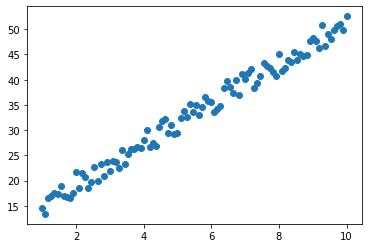

In [19]:
def generateData(a,b):
    #输入a，b作为斜率和截距，生成加入噪声后的类线性关系数据
    x = torch.linspace(1,10,100).unsqueeze(dim=1) #[100x1]
    y = a * x + b + 5*torch.rand(x.shape)
    return x,y

x, y = generateData(4,9)
plt.scatter(x.data,y.data)
plt.show()

epoch:0, loss:1608.285888671875
epoch:500, loss:2.5756185054779053
epoch:1000, loss:2.022087335586548
epoch:1500, loss:2.007488489151001
epoch:2000, loss:2.0071027278900146
epoch:2500, loss:2.0070924758911133
epoch:3000, loss:2.007092237472534
epoch:3500, loss:2.007091760635376
epoch:4000, loss:2.007091760635376
epoch:4500, loss:2.007091760635376
Parameter containing:
tensor([[4.0022]], requires_grad=True)
Parameter containing:
tensor([11.2295], requires_grad=True)


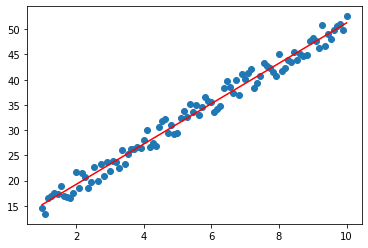

In [20]:
class LinearRegression():
    #定义线性回归模型
    def __init__(self):
        super().__init__()
        self.learning_rate = 0.01
        self.epoch = 5000
        self.criterion = torch.nn.MSELoss() 
        self.model = torch.nn.Linear(1,1)
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate) 
        
    def train(self,x,y):
        #输入数据x和标签y进行训练
        for e in range(self.epoch):
            pred = self.model(x)
            loss = self.criterion(pred,y)
            
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if e % 500 == 0:
                print("epoch:{}, loss:{}".format(e, loss.data))
    
        
    def test(self,x,y):
        #测试，不需要计算梯度
        with torch.no_grad():
            pred = self.model(x)
        return pred 

LR = LinearRegression()
LR.train(x,y)
    
pred = LR.test(x,y)
for p in LR.model.parameters():
    print(p)
plt.scatter(x.data, y.data)
plt.plot(x.data, pred.data,color="r")
plt.show()

可见输出的参数和原始输入的斜率和截距相近，从图中也可以直观看出回归的效果

开始将学习率设置为0.1发现回归效果很差，输出loss后发现loss为nan，发现是因为学习率过大导致无法收敛，甚至loss不断上升，将学习率设置为0.01后解决问题

9. 实现逻辑斯特回归模型

先随机生成数据点，再用反比例函数将数据非线性地分为两部分

在利用pytorch构建模型，利用sigmod函数加线性层实现逻辑斯特回归，损失函数采用BCELoss

在自构造的数据上测试逻辑斯特回归进行非线性二分类的效果

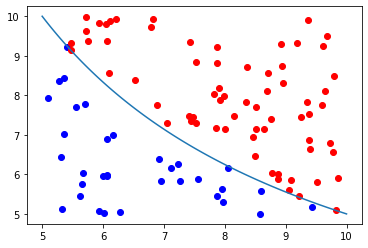

In [21]:
def generateData(a):
    #输入参数a，生成数据
    x = 5 + 5 * torch.rand(100,2)
    y = x[:,0] * x[:,1] - a
    y = torch.gt(y,0).unsqueeze(dim=1).float()
    return x,y

a = 50
x,y = generateData(a)
for i in range(100):
    if y.data[i,0] > 0 :
        plt.scatter(x.data[i,0],x.data[i,1],color="r")
    else:
        plt.scatter(x.data[i,0],x.data[i,1],color="b")

lx = torch.linspace(5,10,100)
ly = a / lx
plt.plot(lx.data,ly.data)
plt.show()

epoch:0, loss:0.8264085650444031
epoch:500, loss:0.5730007290840149
epoch:1000, loss:0.5636593103408813
epoch:1500, loss:0.5547546148300171
epoch:2000, loss:0.546144962310791
epoch:2500, loss:0.5378190875053406
epoch:3000, loss:0.5297670960426331
epoch:3500, loss:0.521979033946991
epoch:4000, loss:0.5144453644752502
epoch:4500, loss:0.5071566104888916


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729141890/work/aten/src/ATen/native/RangeFactories.cpp:23.)


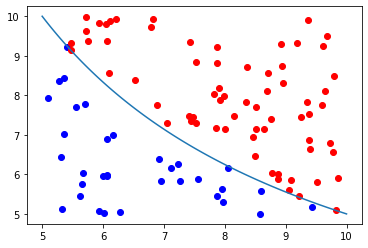

In [22]:
class LogisticModel(torch.nn.Module):
    #逻辑斯特模型，定义前向传播
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(2,1)
    def forward(self,x):
        return torch.sigmoid(self.linear(x))
    
class LogisticRegression():
    #整个逻辑斯特回归模型
    def __init__(self):
        super().__init__()
        self.learning_rate = 0.01
        self.epoch = 5000
        self.model = LogisticModel()
        self.criterion = torch.nn.BCELoss()
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate) 
       
    def train(self,x,y):
        for e in range(self.epoch):
            pred = self.model(x)
            loss = self.criterion(pred,y)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if e % 500 == 0:
                print("epoch:{}, loss:{}".format(e, loss.data))
    
        
    def test(self,x,y):
        with torch.no_grad():
            pred = self.model(x)
        return pred 

LR = LogisticRegression()
LR.train(x,y)
pred = LR.test(x,y)
for i in range(100):
    if y.data[i,0] > 0.5 :
        plt.scatter(x.data[i,0],x.data[i,1],color="r")
    else:
        plt.scatter(x.data[i,0],x.data[i,1],color="b")
lx = torch.linspace(5,10)
ly = a / lx
plt.plot(lx.data,ly.data)
plt.show()

可见，逻辑斯特在非线性分类上的效果很好

10. 实现SVM分类器

通过线性层，损失函数定义为hinge loss即可



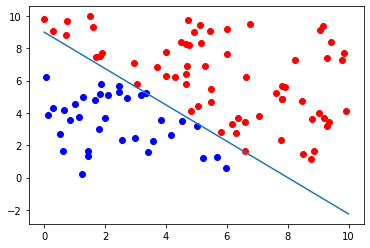

In [23]:
def generateData(w,a):
    #输入参数w，a，输出由该参数定义的超平面分离的数据
    x = 10 * torch.rand(100,2)
    y = torch.mm(x,w.t())+a
    return x,y

w = torch.Tensor([[9,8]])
a = -72
x,y = generateData(w,a)
for i in range(100):
    if y.data[i,0] > 0:
        plt.scatter(x.data[i,0],x.data[i,1],color="r")
    else:
        plt.scatter(x.data[i,0],x.data[i,1],color="b")

lx = torch.linspace(0,10,100)
ly = 9 - 9/8 * lx # 9*x + 8*y = 72
plt.plot(lx.data,ly.data)
plt.show()

epoch:0, loss:0.7167167067527771
epoch:500, loss:0.12649410963058472
epoch:1000, loss:0.09675726294517517
epoch:1500, loss:0.0855247750878334
epoch:2000, loss:0.07653859257698059
epoch:2500, loss:0.07069839537143707
epoch:3000, loss:0.06672018766403198
epoch:3500, loss:0.0637567788362503
epoch:4000, loss:0.06337546557188034
epoch:4500, loss:0.06177058070898056
tensor([[1.5897, 1.4460]])
tensor([-12.5608])


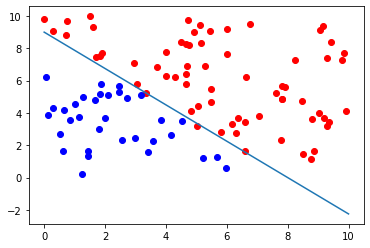

In [24]:
class HingeLoss(torch.nn.Module):
    #继承torch.nn.Module实现HingeLoss
    def __init__(self):
        super().__init__()
        
    def forward(self,x,y): 
        loss = 1 - x * torch.sign(y)
        loss[loss<0] = 0
        return torch.mean(loss)
    
class SVMClassifier():
    def __init__(self):
        super().__init__()
        self.learning_rate = 0.2
        self.epoch = 5000
        self.model = torch.nn.Linear(2,1)
        self.criterion = HingeLoss() #使用HingeLoss作为损失函数
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate) 
        
    def train(self,x,y):
        for e in range(self.epoch):
            pred = self.model(x)
            loss = self.criterion(pred,y)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if e % 500 == 0:
                print("epoch:{}, loss:{}".format(e, loss.data))
    
        
    def test(self,x,y):
        with torch.no_grad():
            pred = self.model(x)
        return pred 
    
SVM = SVMClassifier()
SVM.train(x,y) 
pred = SVM.test(x,y)
for p in SVM.model.parameters():
    print(p.data)

for i in range(100):
    if pred.data[i,0] > 0:
        plt.scatter(x.data[i,0],x.data[i,1],color="r")
    else:
        plt.scatter(x.data[i,0],x.data[i,1],color="b")
lx = torch.linspace(0,10,100)
ly = 9 - 9/8 * lx # 9*x + 8*y = 72
plt.plot(lx.data,ly.data)
plt.show()


开始设置学习率为0.01时分类效果不是很好，发现是因为收敛过慢，将学习率设置为0.2后收敛速度加快，分类效果显著提升。

对比之前的模型，发现相同的学习率会导致不同的效果，说明学习率是和模型相关的超参数

11. 在SVM分类器中加入范数惩罚

第1、2种方法：在损失函数中加入对权重的范数惩罚penalty，由于权重为向量，2范数惩罚与fro范数惩罚等价

第1种方法：继承torch.nn.Module实现Penalty函数并将其加入损失函数中

epoch:0, loss:2.634288787841797
epoch:500, loss:1.1164671182632446
epoch:1000, loss:1.3778964281082153
epoch:1500, loss:1.5235813856124878
epoch:2000, loss:1.6649339199066162
epoch:2500, loss:1.7864655256271362
epoch:3000, loss:1.8855408430099487
epoch:3500, loss:1.985491394996643
epoch:4000, loss:2.078014373779297
epoch:4500, loss:2.142245292663574
tensor([[1.5958, 1.4531]])
tensor([-12.5636])


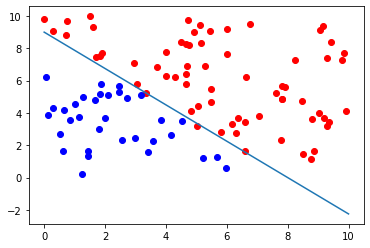

In [25]:
class Penalty(torch.nn.Module):
    #计算权重的范数惩罚 
    def __init__(self):
        super().__init__()
        
    def forward(self,x):
        penal = 0
        for name, param in x.named_parameters():
            if name == "weight":
                penal += torch.norm(param.data)
        return penal
    
class ModifiedSVMClassifier():
    def __init__(self):
        super().__init__()
        self.learning_rate = 0.2
        self.epoch = 5000
        self.model = torch.nn.Linear(2,1)
        self.criterion = HingeLoss()
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate) 
        self.penalty = Penalty()
    
    def train(self,x,y):
        for e in range(self.epoch):
            pred = self.model(x)
            loss = self.criterion(pred,y)  + self.penalty(self.model)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if e % 500 == 0:
                print("epoch:{}, loss:{}".format(e, loss.data))
        
    def test(self,x,y):
        with torch.no_grad():
            pred = self.model(x)
        return pred 
    
SVM = ModifiedSVMClassifier()
SVM.train(x,y) 
pred = SVM.test(x,y)
for p in SVM.model.parameters():
    print(p.data)

for i in range(100):
    if pred.data[i,0] > 0:
        plt.scatter(x.data[i,0],x.data[i,1],color="r")
    else:
        plt.scatter(x.data[i,0],x.data[i,1],color="b")
        
lx = torch.linspace(0,10)
ly = 9 - 9/8 * lx # 9*x + 8*y = 72
plt.plot(lx.data,ly.data)
plt.show()
   

第2种方法：使用pytorch中的norm函数，其默认为2范数

epoch:0, loss:3.6439969539642334
epoch:500, loss:1.1599202156066895
epoch:1000, loss:1.3379634618759155
epoch:1500, loss:1.504439115524292
epoch:2000, loss:1.6679918766021729
epoch:2500, loss:1.7897619009017944
epoch:3000, loss:1.902674913406372
epoch:3500, loss:1.9737262725830078
epoch:4000, loss:2.077256441116333
epoch:4500, loss:2.1332778930664062
tensor([[1.5865, 1.4337]])
tensor([-12.5442])


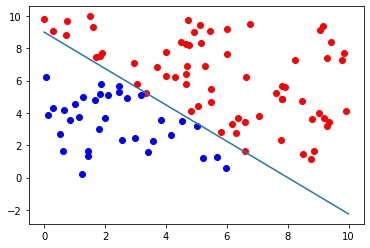

In [26]:
class ModifiedSVMClassifier():
    def __init__(self):
        super().__init__()
        self.learning_rate = 0.2
        self.epoch = 5000
        self.model = torch.nn.Linear(2,1)
        self.criterion = HingeLoss()
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate) 
        
    def penalty(self):
        #计算权重的范数惩罚
        penal = 0
        for name, param in self.model.named_parameters():
            if name == "weight":
                penal += torch.norm(param.data)
        return penal
    
    def train(self,x,y):
        for e in range(self.epoch):
            pred = self.model(x)
            loss = self.criterion(pred,y)  + self.penalty()
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            
            if e % 500 == 0:
                print("epoch:{}, loss:{}".format(e, loss.data))
        
    def test(self,x,y):
        with torch.no_grad():
            pred = self.model(x)
        return pred 
    
SVM = ModifiedSVMClassifier()
SVM.train(x,y) 
pred = SVM.test(x,y)
for p in SVM.model.parameters():
    print(p.data)

for i in range(100):
    if pred.data[i,0] > 0:
        plt.scatter(x.data[i,0],x.data[i,1],color="r")
    else:
        plt.scatter(x.data[i,0],x.data[i,1],color="b")
        
lx = torch.linspace(0,10)
ly = 9 - 9/8 * lx # 9*x + 8*y = 72
plt.plot(lx.data,ly.data)
plt.show()
   

可见，用两种方法实现的范数惩罚，训练后具有极其相近的参数，证明实现方法的等价性

第3种方法：使用pytorch优化器自带的权重衰减

由于权重衰减在一定程度上等价于L2正则化，故可以用权重衰减来实现2范数惩罚

epoch:0, loss:2.0179760456085205
epoch:500, loss:0.12116285413503647
epoch:1000, loss:0.11862686276435852
epoch:1500, loss:0.10191667824983597
epoch:2000, loss:0.09827490150928497
epoch:2500, loss:0.09502292424440384
epoch:3000, loss:0.09590846300125122
epoch:3500, loss:0.10012320429086685
epoch:4000, loss:0.09427592903375626
epoch:4500, loss:0.09176897257566452
tensor([[0.9345, 0.9351]])
tensor([-7.8564])


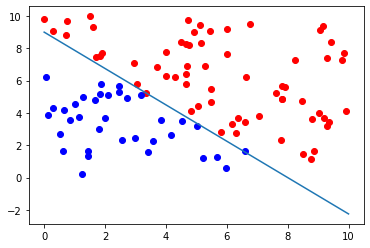

In [27]:
class ModifiedSVMClassifier():
    def __init__(self):
        super().__init__()
        self.learning_rate = 0.2
        self.decay = 0.05
        self.epoch = 5000
        self.model = torch.nn.Linear(2,1)
        self.criterion = HingeLoss()
        self.optimizer_w = torch.optim.SGD(params=[self.model.weight], lr=self.learning_rate, weight_decay=self.decay) 
        self.optimizer_b = torch.optim.SGD(params=[self.model.bias], lr=self.learning_rate)
    
    def train(self,x,y):
        for e in range(self.epoch):
            pred = self.model(x)
            loss = self.criterion(pred,y) 
            
            self.optimizer_w.zero_grad()
            self.optimizer_b.zero_grad()
            loss.backward()
            self.optimizer_w.step()
            self.optimizer_b.step()
            
            if e % 500 == 0:
                print("epoch:{}, loss:{}".format(e, loss.data))
        
    def test(self,x,y):
        with torch.no_grad():
            pred = self.model(x)
        return pred 
    
SVM = ModifiedSVMClassifier()
SVM.train(x,y) 
pred = SVM.test(x,y)
for p in SVM.model.parameters():
    print(p.data)

for i in range(100):
    if pred.data[i,0] > 0:
        plt.scatter(x.data[i,0],x.data[i,1],color="r")
    else:
        plt.scatter(x.data[i,0],x.data[i,1],color="b")
        
lx = torch.linspace(0,10)
ly = 9 - 9/8 * lx # 9*x + 8*y = 72
plt.plot(lx.data,ly.data)
plt.show()
   

导入视觉相关库

In [28]:
import cv2
from torch.utils.data import DataLoader
from torchvision import transforms, datasets
import torch
import numpy as np
import matplotlib.pyplot as plt 
import os, pickle
from PIL import Image

12. 下载CIFAR-10并可视化其中的图片

13. 自构建数据集

添加kaggle中的cifar10-python数据集

自构建的myDataset数据集继承自Dataset类，重载__len__和__getitem__两个成员函数

使用test_batch作为数据读取示例，并显示读取的第一张图片


data:  dict_keys(['batch_label', 'labels', 'data', 'filenames'])
meta:  dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])
label:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


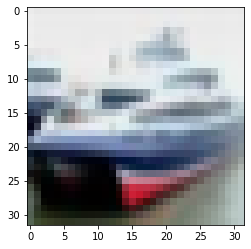

In [29]:
class myDataset(torch.utils.data.Dataset):
    def __init__(self, data, label):
        super().__init__()
        self.data = data
        self.label = label
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        img = self.data[index]
        image = torch.tensor(image,dtype=torch.float)
        
        label = self.label[index]
        label = torch.tensor(label,dtype=torch.long)

        return img,label 

def unpickle(file):
    with open(file,'rb') as f:
        return pickle.load(f,encoding='latin1')
        
def read_data(data_dict):
    x = np.array(data_dict['data']).reshape(-1,3,32,32)
    #需加入下面的transpose否则图片显示会乱掉，但实际训练测试可以不用transpose
    x = np.transpose(x, (0,2,3,1))
    plt.imshow(x[1])
    y = np.array(data_dict['labels'])
    return x,y 

path = "../input/cifar10-python/cifar-10-batches-py/"
data_dict = unpickle(path + "test_batch")
print("data: ", data_dict.keys())
x,y = read_data(data_dict)

meta_dict = unpickle(path + "batches.meta")
print("meta: ", meta_dict.keys())
print("label: ", meta_dict['label_names'])
dataset = myDataset(x,y)
dataLoader = DataLoader(dataset,batch_size=64,shuffle=True)


14. 使用pytorch自带的dataloader

比较加载数据中使用不同参数的时间


data_shape (50000, 32, 32, 3)


batch 	 time
1 	 7.843971252441406e-05
4 	 3.600120544433594e-05
64 	 3.62396240234375e-05
1024 	 3.361701965332031e-05


worker 	 time
0 	 3.933906555175781e-05
1 	 5.125999450683594e-05
4 	 3.337860107421875e-05
16 	 3.1948089599609375e-05


pin 	 time
0 	 3.0994415283203125e-05
1 	 4.5299530029296875e-05


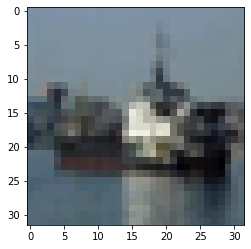

In [30]:
X = []
Y = []
path = "../input/cifar10-python/cifar-10-batches-py/"
for i in range(5):
    data_dict = unpickle(path + "data_batch_" + str(i+1))
    x,y = read_data(data_dict)
    X.append(x)
    Y.append(y)

X = np.concatenate(X)
Y = np.concatenate(Y)
print("data_shape", X.shape)

import time
print("\n")
print("batch","\t","time")
for B in [1,4,64,1024]:
    begin = time.time()
    DataLoader(dataset, batch_size=B)
    end = time.time()
    print(B,"\t",end-begin)

print("\n")
print("worker","\t","time")
for N in [0,1,4,16]:
    begin = time.time()
    DataLoader(dataset, num_workers=N)
    end = time.time()
    print(N,"\t",end-begin)

print("\n")
print("pin","\t","time")
for P in [0,1]:
    begin = time.time()
    DataLoader(dataset, pin_memory=P)
    end = time.time()
    print(P,"\t",end-begin)


对比可见，使用更大batch_size、更大的num_workers会具有更快的读取速度

但并不需要太大，取决于数据集的大小，在此例子中，pin_memory对数据读取速度没有显著影响（可能由于数据集太小导致对比不明显）

15. 计算CIFAR-10 RGB三通道的std

调用numpy中的std函数

data_shape (10000, 32, 32, 3)
channel 	 std
R 	 62.89639134921991
G 	 61.93752718231365
B 	 66.70605639561605


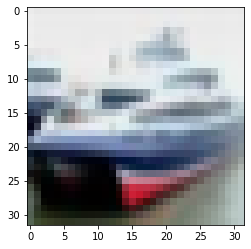

In [31]:
data_dict = unpickle(path + "test_batch")
x,y = read_data(data_dict)
print("data_shape", x.shape)
R = x[:,:,:,0]
G = x[:,:,:,1]
B = x[:,:,:,2]
print("channel \t std")
print("R","\t",np.std(R))
print("G","\t",np.std(G))
print("B","\t",np.std(B))

16. numpy练习

16.1 实现直角坐标系到极坐标系的转换

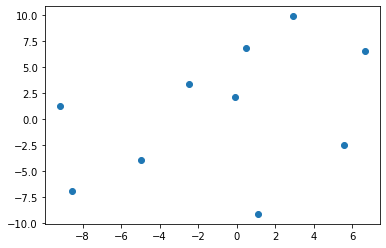

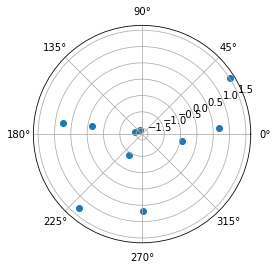

In [32]:
import numpy as np
import matplotlib.pyplot as plt

x = -10 + 20 * np.random.rand(10,2)       
y = np.empty(x.shape)                
plt.scatter(x[:,0],x[:,1])
plt.show()

for i in range(10):
    a,b = x[i,0], x[i,1]
    r = (a**2 + b**2 ) ** 0.5
    theta = np.arctan(b/a)
    y[i,0], y[i,1] = theta,r

ax = plt.subplot(111,projection='polar')
ax.scatter(y[:,1], y[:,0])
plt.show()

转换后在极坐标绘制散点图，与直角坐标系中点一致

16.2 继承np.ndarray类构造对称矩阵类

重载new和setitem函数，new时返回空矩阵，setitem时将对称位置的元素也赋值

In [33]:
class SymmetricMatrix(np.ndarray):  
    def __new__(cls, shape): 
        M = super().__new__(cls,shape)
        rows,cols = shape
        for i in range(rows):
            M[i,i] = 0
            for j in range(i):
                M[i,j] = 0
        return M
        
    def __setitem__(self, key, value):
        i, j = key
        super().__setitem__((i,j),value)
        super().__setitem__((j,i),value)

M = SymmetricMatrix((5,5))
M[1,3]=4
print(M)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


16.3 点到直线的距离

先将由由两点式表示的直线转换为标准型Ax+By+C=0, 再计算并返回距离d

In [34]:
def point_distance(P1,P2,P):
    x1,y1 = P1
    x2,y2 = P2
    x,y = P
    A,B,C = y2-y1, -(x2-x1), -(y2-y1)*x1 + (x2-x1)*y1
    r = (A**2+B**2)**0.5 
    d = np.abs(A*x+B*y+C) / r
    return d

def distance(P1,P2,P):
    D = []
    for i in range(len(P1)):
        D.append(point_distance(P1[i],P2[i],P[i]))
    return D

P1 = [(1,1),(2,2),(3,3)]
P2 = [(1,-1),(2,-2),(3,-3)]
P = [(2,0),(3,0),(4,0)]
print(distance(P1,P2,P))

[1.0, 1.0, 1.0]


17. 双线性插值

将索引i,j转换为整数ni,nj，再判断索引点是否为整格点,计算四周的值并求平均

In [35]:
def biInterpolation(A, pos):
    #输入矩阵A，位置pos，输出双线性插值后的值
    rows, cols = A.shape
    i,j = pos
    i -= 1
    j -= 1
    ni,nj = int(i),int(j)
    
    if nj==j:
        l = r = j
    else:
        l,r = max(nj,0), min(nj+1,rows-1)
    
    if ni==i:
        u = d = i
    else:
        u,d = max(ni,0), min(ni+1, cols-1)
               
    return (A[u][l]+A[d][l]+A[u][r]+A[d][r]) / 4

A = np.array([[110, 120, 130],
            [210, 220, 230],
            [310, 320, 330]])

print(biInterpolation(A, (1, 1)) == 110)
print(biInterpolation(A, (2.5, 2.5)) == 275)

True
True


可见，函数通过了样例测试

18. 笛卡尔积

递归计算笛卡尔积，遍历list中的第一个元素，与其余元素的笛卡尔积相连接

In [36]:
def product(lst):
    #输入列表lst，输出笛卡尔积，当lst元素小于2时为递归边界
    if len(lst)<=1:
        return lst
    elif len(lst)==2:
        return [[x,y]for x in lst[0] for y in lst[1]]
    else:
        l = []
        a,b = lst[0],product(lst[1::])
        return [[x]+y for x in a for y in b]
        
x = [[1,2,3], [4,5],[6,7]]
print(product(x))

[[1, 4, 6], [1, 4, 7], [1, 5, 6], [1, 5, 7], [2, 4, 6], [2, 4, 7], [2, 5, 6], [2, 5, 7], [3, 4, 6], [3, 4, 7], [3, 5, 6], [3, 5, 7]]


19. 提取指定大小的子矩阵并填充

In [37]:
def valid(a,pos):
    #判断pos位置在矩阵A中是否合法
    rows,cols = a.shape
    i,j = pos
    return i>=0 and j>=0 and i<rows and j<cols

def subpart(a,shape,fill,pos):
    #提取矩阵a的子矩阵b并用fill填充
    rows, cols = a.shape
    x,y = pos
    h,w = shape
    b = np.empty(shape)
    
    for i in range(h):
        for j in range(w):
            i0, j0 = x - h//2 + i, y - w//2 + j
            if valid(a,(i0,j0)):
                b[i,j] = a[i0,j0]
            else:
                b[i,j] = fill    
    return b

shape = (4, 4)
fill = 0
pos = (1,1)
a = np.random.randint(0, 10, (5, 5))
print(a)
b = subpart(a,shape,fill,pos)
print(b)


[[3 2 9 2 3]
 [2 2 9 0 2]
 [6 0 8 1 0]
 [7 4 6 6 5]
 [7 3 6 4 4]]
[[0. 0. 0. 0.]
 [0. 3. 2. 9.]
 [0. 2. 2. 9.]
 [0. 6. 0. 8.]]


20. 不使用numpy的矩阵操作

矩阵求逆时，采用高斯消元法

判断矩阵相等时，改用math.isclose比较浮点数更为精确

In [38]:
import math
def create(n,m):
    #创建一个n行m列的全零矩阵
    a = []
    for i in range(n):
        l = []
        for j in range(m):
            l.append(0)
        a.append(l)
    return a

def add(A,B):
    #矩阵加法
    n,m = len(A), len(A[0])
    C = create(n,m)
    for i in range(n):
        for j in range(m):
            C[i][j] = A[i][j] + B[i][j]
    return C

def sub(A,B):
    #矩阵减法
    n,m = len(A), len(A[0])
    C = create(n,m)
    for i in range(n):
        for j in range(m):
            C[i][j] = A[i][j] - B[i][j]
    return C

def scalar_mul(A,a):
    #矩阵和标量相乘
    n,m = len(A),len(A[0])
    B = create(n,m)
    for i in range(n):
        for j in range(m):
            B[i][j] = A[i][j] * a
    return B

def mul(A,B):
    #矩阵乘法
    n,m,s = len(A),len(B[0]),len(B)
    C = create(n,m)
    for i in range(n):
        for j in range(m):
            tot = 0
            for k in range(s):
                tot += A[i][k] * B[k][j]
            C[i][j] = tot
    return C

def identity(n):
    #生成n阶单位阵
    A = create(n,n)
    for i in range(n):
        A[i][i] = 1
    return A

def transpose(A):
    #返回矩阵A的转置
    n,m = len(A),len(A[0])
    B = create(m,n)
    for i in range(n):
        for j in range(m):
            B[j][i] = A[i][j]
    return B

def equal(A,B):
    #判断两个浮点矩阵是否相等，采用math.isclose函数逐个判断每个元素
    if len(A)!=len(B) or len(A[0])!=len(B[0]):
        return False
    n,m = len(A),len(A[0])
    for i in range(n):
        for j in range(m):
            if math.isclose(A[i][j],B[i][j]) is False:
                return False
    return True

def copy(A):
    #输入矩阵A，返回矩阵A的拷贝B
    n,m = len(A),len(A[0])
    B = create(n,m)
    for i in range(n):
        for j in range(m):
            B[i][j] = A[i][j]
    return B

def inverse(B):    
    #矩阵求逆，使用高斯消元法
    A = copy(B)
    n = len(A)
    C = identity(n)
    for j in range(n):
        #找到绝对值最大的非零元素作为主元
        k = j
        for i in range(j,n):
            if abs(A[i][j]) > abs(A[k][j]) and abs(A[i][j])!=0:
                k = i
        
        #交换两行
        A[j], A[k] = A[k], A[j]
        C[j], C[k] = C[k], C[j]
                
        #将对角元素设置为1
        a = A[j][j]
        C[j] = [x/a for x in C[j]]
        A[j] = [x/a for x in A[j]]
    
        #用主元将同一列的非对角元素消去为0
        for i in range(n):
            if i != j and A[i][j] != 0:
                a = A[i][j]
                t = [x*a for x in C[j]]
                C[i] = [C[i][k] - t[k] for k in range(n)]
                
                t = [x*a for x in A[j]]
                A[i] = [A[i][k] - t[k] for k in range(n)]
                        
    return C
 
A = [[12, 10], [3, 9]]
B = [[3, 4], [7, 4]]
C = [[11, 12, 13, 14], [21, 22, 23, 24], [31, 32, 33, 34], [41, 42, 43, 44]]
D = [[3, 0, 2], [2, 0, -2], [0, 1, 1]]

#测试样例
print(add(A, B) == [[15, 14], [10, 13]])
print(sub(A, B) == [[9, 6], [-4, 5]])
print(scalar_mul(B, 3) == [[9, 12], [21, 12]])
print(mul(A, B) == [[106, 88], [72, 48]])
print(identity(3) == [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
print(transpose(C) == [[11, 21, 31, 41], [12, 22, 32, 42], [13, 23, 33, 43], [14, 24, 34, 44]])
print(equal(inverse(D), [[0.2, 0.2, 0.0], [-0.2, 0.30000000000000004, 1.0], [0.2, -0.30000000000000004, 0.0]]))

True
True
True
True
True
True
True


21. 最大公约数

In [39]:
def gcd(a,b):
    a,b = abs(a), abs(b)
    if a<b:
        a,b = b,a
    if b==0:
        return a
    else:
        return gcd(b,a%b)
    
print(gcd(3,5)==1)
print(gcd(6,3)==3)
print(gcd(-2,6)==2)
print(gcd(0,3)==3)

True
True
True
True


In [40]:
22. 和为N的连续数字

SyntaxError: invalid syntax (<ipython-input-40-925f80286f2d>, line 1)

设k为连续数字的个数，n为连续数字的首个，满足k*(n+n+k-1)/2 == N

有n>0, 故k^2 < k^2+k = 2N, 故 k < sqrt(2N) = m

故只需在range(1,m)中枚举k， 用k计算得到 n = (2 N/k + 1- k)/2， 再判断n是否为整数即可


In [41]:
def find(N):
    m = int((2*N)**2)+1
    for k in range(1,m):
        if (2*N)%k != 0:
            continue
        n = (2*N/k + 1- k)/2
        if n>0 and int(n)==n:
            l = []
            for i in range(k):
                l.append(i+n)
            print(l)

find(1000)

[1000.0]
[198.0, 199.0, 200.0, 201.0, 202.0]
[55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0]
[28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0]


23. 密码检查

采用正则表达式

In [42]:
import re

def check(s):
    #判断密码s是否符合要求
    if len(s)<6 or len(s)>12:
        return False
    
    lowers = re.search("[a-z]",s)
    uppers = re.search("[A-Z]",s)
    numbers = re.search("[0-9]",s)
    others = re.search("[$#@]",s)
   
    if lowers and uppers and numbers and others:
        return True
    else:
        return False

def find(A):
    #输入密码列表A，返回合法密码列表B
    B = []
    for a in A:
        if check(a) is True:
            B.append(a)
    return B

A = ["ABd1234@1","a F1#","2w3E*","2We3345"]
print(find(A))

['ABd1234@1']


24. 完成UCL上的三个机器学习任务

25. 利用pytorch实现猫狗分类